In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("income.csv")

In [3]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


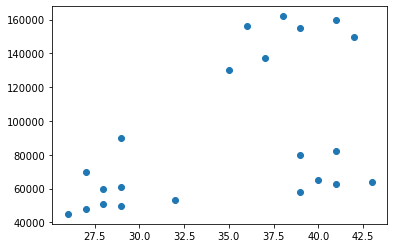

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df.Age,df['Income($)'])

In [5]:
km= KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df['clusters']=y_pred

In [7]:
df

,Name,Age,Income($),clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


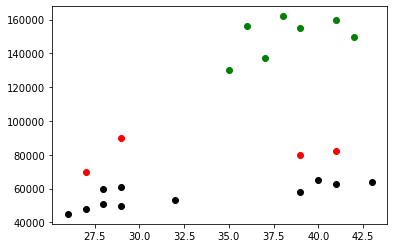

In [8]:
df0= df[df.clusters==0]
df1= df[df.clusters==1]
df2= df[df.clusters==2]
plt.scatter(df0.Age,df0['Income($)'],color='Red')
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='black')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df[['Age']])
Age_scaled=scaler.transform(df[['Age']])
np.min(Age_scaled)

0.0

In [10]:

scaler.fit(df[['Income($)']])
Income_scaled=scaler.transform(df[['Income($)']])
Income_scaled

array([[0.21367521],
       [0.38461538],
       [0.13675214],
       [0.12820513],
       [0.8974359 ],
       [0.94017094],
       [0.98290598],
       [1.        ],
       [0.94871795],
       [0.72649573],
       [0.78632479],
       [0.        ],
       [0.02564103],
       [0.05128205],
       [0.03846154],
       [0.06837607],
       [0.17094017],
       [0.15384615],
       [0.16239316],
       [0.2991453 ],
       [0.31623932],
       [0.11111111]])

In [11]:
y_pred=km.fit_predict(Age_scaled,Income_scaled)

In [12]:
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2])

In [13]:
df['Age']=Age_scaled
df['Income($)']=Income_scaled
df['clusters']=y_pred

In [14]:
df

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


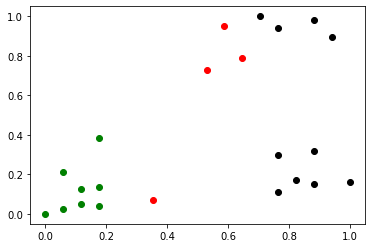

In [15]:
df0= df[df.clusters==0]
df1= df[df.clusters==1]
df2= df[df.clusters==2]
plt.scatter(df0.Age,df0['Income($)'],color='Red')
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='black')

In [16]:
sse=[]
k_range= [1,2,3,4,5,6,7,8,9]
print(k_range)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\Users\karan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


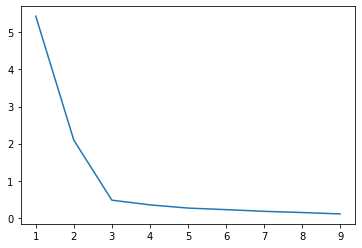

In [17]:
plt.plot(k_range,sse)